# Naive Bayes Models

In this lab you will work with **naive Bayes models**. Naive Bayes models are a surprisingly useful and effective simplification of the general Bayesian models. Naive Bayes models make the naive assumption of statistical independence of the features. In many cases, naive Bayes module are surprisingly effective despite violating the assumption of independence. 

In simple terms, naive Bayes models use empirical distributions of the features to compute probabilities of the labels. The naive Bayes models can use most any family of distributions for the features. It is important to select the correct distribution family for the data you are working with. Common cases are:
- **Gaussian;** for continuous or numerical features.
- **Bernoulli;** for features with binary values. 
- **Multinomial;** for features with more than two categories. 

These is one pit fall, the model fails if a zero probability is encountered. This situation occurs when there is a 'hole' in the sample space where there are no samples. A simple smoothing procedure can deal with this problem. The smoothing hyperparameter, usually called alpha, is one of the few required for naive Bayes models. 

Some properties of naive Bayes models are:
- Computational complexity is linear in number of parameter/features, making naive Bayes models highly scalable. There are out or core approaches suitable for massive datasets.
- Requires minimal data to produce models that generalizes well. If there are only a few cases per category to train a model a naive Bayes model can be a good choice. 
- Have a simple and inherent regularization.

Naive Bayes models are used in many situations including:

- Document classification
- SPAM detection
- Image classification 



## Example: Iris dataset

As a first example you will use a naive Bayes model to classify the species of iris flowers. 

As a first step, execute the code in the cell below to load the required packages to run the rest of this notebook. 

In [1]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB, BernoulliNB
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr

%matplotlib inline

To get a feel for these data, you will now load and plot them. The code in the cell below does the following:

1. Loads the iris data as a Pandas data frame. 
2. Adds column names to the data frame.
3. Displays all 4 possible scatter plot views of the data. 

Execute this code and examine the results. 

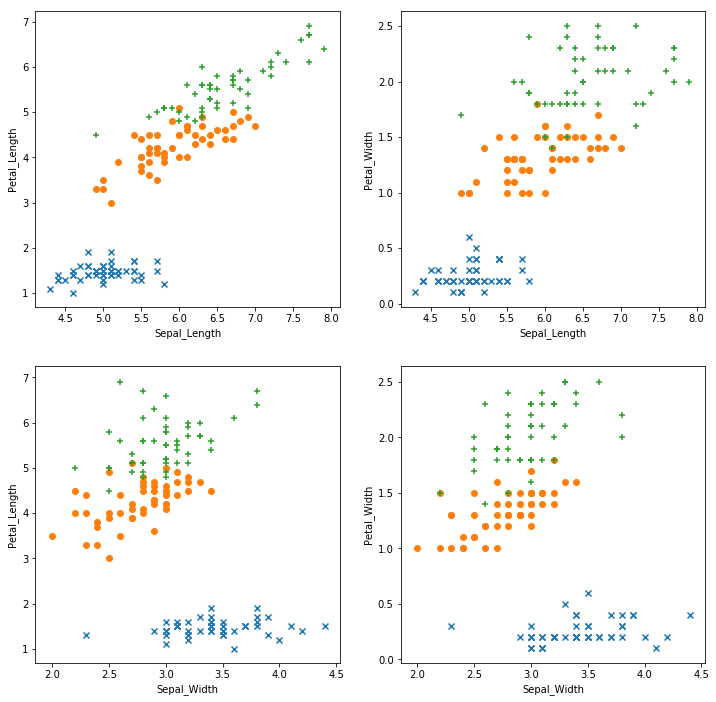

In [2]:
def plot_iris(iris):
    '''Function to plot iris data by type'''
    setosa = iris[iris['Species'] == 'setosa']
    versicolor = iris[iris['Species'] == 'versicolor']
    virginica = iris[iris['Species'] == 'virginica']
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    for i in range(2):
        for j in range(2):
            ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = 'x')
            ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = 'o')
            ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = '+')
            ax[i,j].set_xlabel(x_ax[i])
            ax[i,j].set_ylabel(y_ax[j])
            
## Import the dataset from sklearn.datasets
iris = datasets.load_iris()

## Create a data frame from the dictionary
species = [iris.target_names[x] for x in iris.target]
iris = pd.DataFrame(iris['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris['Species'] = species

## Plot views of the iris data            
plot_iris(iris) 

You can see that Setosa (blue) is well separated from the other two categories. The Versicolor (orange) and the Virginica (green) show considerable overlap. The question is how well our classifier will separate these categories. 

Scikit Learn classifiers require numerically coded numpy arrays for the features and as a label. The code in the cell below does the following processing:
1. Creates a numpy array of the features.
2. Numerically codes the label using a dictionary lookup, and converts it to a numpy array. 

Execute this code.

In [3]:
Features = np.array(iris[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']])

levels = {'setosa':0, 'versicolor':1, 'virginica':2}
Labels =  np.array([levels[x] for x in iris['Species']])

Next, execute the code in the cell below to split the dataset into test and training set. Notice that unusually, 100 of the 150 cases are being used as the test dataset. 

In [4]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 100)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

As is always the case with machine learning, numeric features  must be scaled. The code in the cell below performs the following processing:

1. A Zscore scale object is defined using the `StandarScaler` function from the scikit-learn preprocessing package. 
2. The scaler is fit to the training features. Subsequently, this scaler is used to apply the same scaling to the test data and in production. 
3. The training features are scaled using the `transform` method. 

Execute this code.

In [5]:
scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

Now you will define and fit a Gaussian naive Bayes model. A Gaussian model is appropriate here since all of the features are numeric. 

The code in the cell below defines a Gaussian naive Bayes model object using the `GaussianNB` function from the scikit-learn naive_bayes package, and then fits the model. Execute this code.

In [ ]:
NB_mod = GaussianNB()
NB_mod.fit(X_train, y_train)

Notice that the Gaussian naive Bayes model object has only one hyperparameter. 

Next, the code in the cell below performs the following processing to score the test data subset:
1. The test features are scaled using the scaler computed for the training features. 
2. The `predict` method is used to compute the scores from the scaled features. 

Execute this code. 

In [ ]:
X_test = scale.transform(X_test)
scores = NB_mod.predict(X_test)

It is time to evaluate the model results. Keep in mind that the problem has been made deliberately difficult, by having more test cases than training cases. 

The iris data has three species categories. Therefore it is necessary to use evaluation code for a three category problem. The function in the cell below extends code from previous labs to deal with a three category problem. 

Execute this code, examine the results, and answer **Question 1** on the course page.

In [ ]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score Setosa   Score Versicolor    Score Virginica')
    print('Actual Setosa      %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual Versicolor  %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual Vriginica   %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Setosa  Versicolor  Virginica')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    
print_metrics_3(y_test, scores)   

Examine these results. Notice the following:
1. The confusion matrix has dimension 3X3. You can see that most cases are correctly classified. 
2. The overall accuracy is 0.91. Since the classes are roughly balanced, this metric indicates relatively good performance of the classifier, particularly since it was only trained on 50 cases. As was mentioned previously, naive Bayes models require only small amounts of training data. 
3. The precision, recall and  F1 for each of the classes is relatively good. Versicolor has the worst metrics since it has the largest number of misclassified cases. 

To get a better feel for what the classifier is doing, the code in the cell below displays a set of plots showing correctly (as '+') and incorrectly (as 'o') cases, with the species color-coded. Execute this code and examine the results. 

In [ ]:
def plot_iris_score(iris, y_test, scores):
    '''Function to plot iris data by type'''
    ## Find correctly and incorrectly classified cases
    true = np.equal(scores, y_test).astype(int)
    
    ## Create data frame from the test data
    iris = pd.DataFrame(iris)
    levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
    iris['Species'] = [levels[x] for x in y_test]
    iris.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
    
    ## Set up for the plot
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    markers = ['o', '+']
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    
    for t in range(2): # loop over correct and incorect classifications
        setosa = iris[(iris['Species'] == 'setosa') & (true == t)]
        versicolor = iris[(iris['Species'] == 'versicolor') & (true == t)]
        virginica = iris[(iris['Species'] == 'virginica') & (true == t)]
        # loop over all the dimensions
        for i in range(2):
            for j in range(2):
                ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = markers[t], color = 'blue')
                ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = markers[t], color = 'orange')
                ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = markers[t], color = 'green')
                ax[i,j].set_xlabel(x_ax[i])
                ax[i,j].set_ylabel(y_ax[j])

plot_iris_score(X_test, y_test, scores)

Examine these plots. You can see how the classifier has divided the feature space between the classes. Notice that most of the errors occur in the overlap region between Virginica and Versicolor. This behavior is to be expected. 

## Another example

Now, you will try a more complex example using the credit scoring data. You will use the prepared data which had the the following preprocessing:
1. Cleaning missing values.
2. Aggregating categories of certain categorical variables. 
3. Encoding categorical variables as binary dummy variables.
4. Standardizing numeric variables. 

Execute the code in the cell below to load the features and labels as numpy arrays for the example. 

In [ ]:
Features = np.array(pd.read_csv('Credit_Features.csv'))
Labels = np.array(pd.read_csv('Credit_Labels.csv'))
Labels = Labels.reshape(Labels.shape[0],)
print(Features.shape)
print(Labels.shape)

The Features array has both numeric features and binary features (dummy variables for the categorical features). Therefore, a Gaussian model must be used. However, this model is not ideal, since numeric features are mixed with features exhibiting Bernoulli distributions, the binary features. 

The code in the cell below does the following processing:
1. Defines a 10 fold cross validation object. 
2. Defines a Gaussian naive Bayes model.
3. Performs a 10 fold cross validation.
4. Prints results from the cross validation. 

Execute this code and examine the result. 

In [ ]:
nr.seed(321)
cv_folds = ms.KFold(n_splits=10, shuffle = True)
    
nr.seed(498)
NB_credit = GaussianNB()
cv_estimate = ms.cross_val_score(NB_credit, Features, Labels, 
                                 cv = cv_folds) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

In [ ]:
nr.seed(498)
NB_credit = GaussianNB()
cv_estimate = ms.cross_val_score(NB_credit, Features, Labels, 
                                 cv = 10) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Examine these results. Notice that the standard deviation of the mean of the AUC is more than an order of magnitude smaller than the mean. This indicates that this model is likely to generalize well. 

Now, you will build and test a model using a single split of the dataset. As a first step, execute the code in the cell below to create training and testing dataset.

In [ ]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

The code in the cell below defines a naive Bayes model object and then fits the model to the training data. Execute this code:

In [ ]:
NB_credit_mod = GaussianNB() 
NB_credit_mod.fit(X_train, y_train)

Using the test data subset, the code in the cell below scores and prints evaluation metrics for the model. 

Execute this code, examine the results, and answer **Question 2** on the course page. 

In [ ]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = NB_credit_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

Overall, these performance metrics are poor. Barely half the bad credit risk customers are correctly identified. The reported AUC is quite a bit better than the mean achieved with the 5 fold cross validation. It is likely these figures are optimistic. 

Perhaps, a Bernoulli naive Bayes model will work better. Since naive Bayes models tend to be less sensitive to the quantity of training data, this approach may be reasonable. To apply this model, the numeric features must be dropped from the array. Execute the code in the cell below to remove the numeric features and examine the resulting sample. 

In [ ]:
Features = Features[:,4:]
Features[:3,:]

You can see that all of the features are binary. A Bernoulli naive Bayes can now be applied to these features. 

10 fold nested cross validation is used to estimate the optimal hyperparameter and performs model selection for the naive Bayes model. Execute the code in the cell below to define inside and outside fold objects.

In [ ]:
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)

The code in the cell below estimates the best hyperparameters using 10 fold cross validation. There are two points to notice here:
1. In this case, a grid for one hyperparameter: alpha is the smoothing parameter to avoid zero probabilities.  
3. The model is fit on the grid and the best estimated hyperparameters are printed. 

Execute this code and examine the result. 

In [ ]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}
## Define the NB regression model
NB_clf = BernoulliNB() 

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = NB_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(Features, Labels)
print(clf.best_estimator_.alpha)

The smallest alpha hyperparameter has been selected. This indicates that there is very little problem with zero probabilities in this problem. This situation results from the fact that the probability space sampled is dense. 

The code in the cell below executes the outer loop of the cross validation to estimate model performance with the optimal hyperparameter. Execute this code and examine the result.

In [ ]:
#NB_credit = BernoulliNB(alpha = clf.best_estimator_.alpha)
nr.seed(498)
cv_estimate = ms.cross_val_score(clf, Features, Labels, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

At first look, the AUC seems reasonable. The standard deviation is an order of magnitude less than the AUC. 

Next, sample the dataset into training and testing subsets by executing the code in the cell below.

In [ ]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

Now, execute the code below to fit and score the Bernoulli naive Bayes model and display the performance metrics. 

In [ ]:
NB_credit_mod = BernoulliNB(alpha = clf.best_estimator_.alpha) 
NB_credit_mod.fit(X_train, y_train)
probabilities = NB_credit_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

The results for this Bernoulli naive Bayes model are much better than for the Gaussian model. Still, they could be better.

The current model uses the empirical distribution of the label values for the prior value of $p$ of the Bernoulli distribution. This probability is invariably skewed toward the majority case. Since the bank cares more about the minority case, setting this distribution to a fixed prior value can help overcome the class imbalance. The code in the cell below redefines the model object with prior probability of 0.6 for the minority case. 

Execute this code, examine the results, and answer **Question 3** on the course page.

In [ ]:
NB_credit_mod = BernoulliNB(alpha = clf.best_estimator_.alpha,
                            class_prior = [0.4,0.6]) 
NB_credit_mod.fit(X_train, y_train)
probabilities = NB_credit_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

The majority of bad credit cases are now correctly identified. However, this characteristic is at the cost of a high false negative error rate. Still, given that the cost to the bank of a false negative is five times the cost of a false positive, this may be a good solution. An infinite number of other models are possible by changing the prior distribution. 

## Summary

In this lab you have accomplished the following:
1. Used a Gaussian naive model to classify the cases of the iris data. The overall model performance was reasonable. 
2. Fit a Gaussian naive Bayes model on the bank credit data. The performance of this model was poor as a result of many Bernoulli distributed dummy features.
3. Used a Bernoulli naive Bayes model for the bank credit data by eliminating the numeric features. Overall, this model was much better. 
4. A model skewed toward detecting bad credit cases was created using a prior distribution rather than the empirical distribution of the labels. This model correctly classified a significant number of the bad credit cases. Selecting other prior distributions will give other models. 